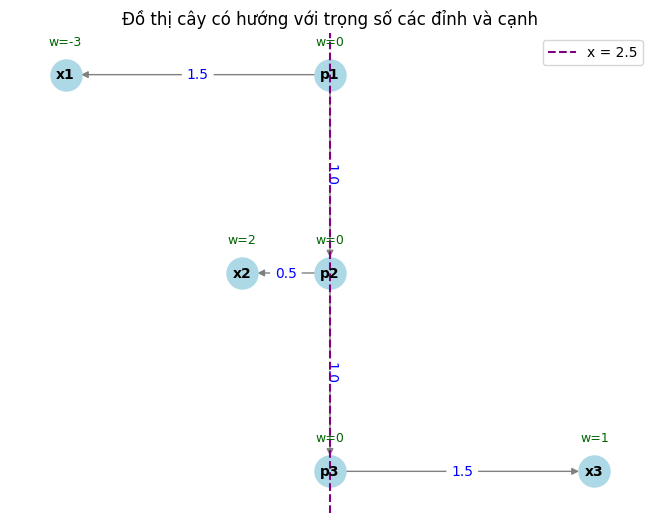

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import math

# Tọa độ của các điểm
x1 = (1, 1)
x2 = (2, 4)
x3 = (3, 2)
x4 = (-1, 2.5)

# Hình chiếu của các điểm lên đường thẳng x = 2.5
p1 = (2.5, 1)  # Hình chiếu của x1
p2 = (2.5, 4)  # Hình chiếu của x2
p3 = (2.5, 2)  # Hình chiếu của x3
p4 = (2.5, 2.5)
# Tạo đồ thị có hướng
G = nx.DiGraph()

# Thêm các đỉnh vào đồ thị và gán trọng số
G.add_node("x1", pos=x1, weight=2)
G.add_node("x2", pos=x2, weight=-1)
G.add_node("x3", pos=x3, weight=3)
G.add_node("x4", pos=x3, weight=-4)
G.add_node("p1", pos=p1, weight=0)
G.add_node("p2", pos=p2, weight=0)
G.add_node("p3", pos=p3, weight=0)
G.add_node("p4", pos=p4, weight=0)
# Hàm tính khoảng cách Euclid
def euclidean_distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

# Thêm các cạnh vào đồ thị với trọng số là khoảng cách
G.add_edge("p1", "x1", weight=euclidean_distance(p1, x1))
G.add_edge("p2", "x2", weight=euclidean_distance(p2, x2))
G.add_edge("p3", "x3", weight=euclidean_distance(p3, x3))

# Thêm cạnh nối giữa các điểm hình chiếu (tạo thành cây)
G.add_edge("p1", "p2", weight=euclidean_distance(p1, p2))
G.add_edge("p2", "p3", weight=euclidean_distance(p2, p3))

# Lấy vị trí của các đỉnh
pos = nx.get_node_attributes(G, 'pos')

# Lấy trọng số của các cạnh
edge_labels = nx.get_edge_attributes(G, 'weight')

# Lấy trọng số của các đỉnh
node_weights = nx.get_node_attributes(G, 'weight')

# Vẽ đồ thị
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray', arrows=True)

# Vẽ trọng số trên các cạnh
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue')

# Vẽ trọng số trên các đỉnh
for node, (x, y) in pos.items():
    plt.text(x, y + 0.15, f'w={node_weights[node]}', fontsize=9, ha='center', color='darkgreen')

# Vẽ đường thẳng x = 2.5
plt.axvline(x=2.5, color='purple', linestyle='--', label='x = 2.5')

# Hiển thị chú thích
plt.legend()

# Đặt tiêu đề cho đồ thị
plt.title("Đồ thị cây có hướng với trọng số các đỉnh và cạnh")

# Hiển thị đồ thị
plt.show()


In [2]:

# Hàm DFS để xác định cây con
def dfs_subtree(graph, start_node):
    visited = set()
    stack = [start_node]
    subtree_nodes = set()

    while stack:
        node = stack.pop()
        if node not in visited:
            visited.add(node)
            subtree_nodes.add(node)
            stack.extend([n for n in graph.successors(node) if n not in visited])

    return subtree_nodes


In [3]:

# Xác định gốc của cây lớn ban đầu (điểm hình chiếu có tung độ lớn nhất)
root = max(["p1", "p2", "p3"], key=lambda k: G.nodes[k]['pos'][1])
print(f"Gốc của cây lớn ban đầu là: {root}")

# Xác định cây lớn ban đầu có gốc là root (p1)
tree_nodes = dfs_subtree(G, root)
print(f"Các đỉnh của cây lớn có gốc là {root}: {tree_nodes}")

# Xác định cây con có gốc là p3
subtree_root = "x1"
subtree_nodes = dfs_subtree(G, subtree_root)
print(f"Các đỉnh của cây con có gốc là {subtree_root}: {subtree_nodes}")

# Tính tổng trọng số của cây con
subtree_weight = sum(G.nodes[node]['weight'] for node in subtree_nodes)
print(f"Trọng số của cây con có gốc là {subtree_root}: {subtree_weight}")

# In ra độ dài cạnh (p1, x1)
edge_length_p1_x1 = G["p1"]["x1"]["weight"]
print(f"Độ dài cạnh (p1, x1) là: {edge_length_p1_x1}")

# In ra trọng số của các đỉnh x1, x2, x3
print(f"Trọng số của đỉnh x1 là: {G.nodes['x1']['weight']}")

Gốc của cây lớn ban đầu là: p1
Các đỉnh của cây lớn có gốc là p1: {'p1', 'p3', 'x2', 'x3', 'x1', 'p2'}
Các đỉnh của cây con có gốc là x1: {'x1'}
Trọng số của cây con có gốc là x1: -3
Độ dài cạnh (p1, x1) là: 1.5
Trọng số của đỉnh x1 là: -3


In [4]:
import numpy as np

# Hàm để lấy tất cả các cây con từ một đỉnh
def get_all_subtrees(graph, start_node):
    visited = set()
    subtrees = []

    def dfs(node):
        visited.add(node)
        subtree_nodes = {node}
        for successor in graph.successors(node):
            if successor not in visited:
                subtree_nodes.update(dfs(successor))
        subtrees.append(subtree_nodes)
        return subtree_nodes

    dfs(start_node)
    return subtrees

# Xác định tất cả các cây con từ gốc của cây lớn
root = max(["p1", "p2", "p3"], key=lambda k: G.nodes[k]['pos'][1])  # Gốc của cây lớn
all_subtrees = get_all_subtrees(G, root)


# Khởi tạo danh sách để lưu trữ trọng số của các cây con
subtree_weights = []

# Tính tổng trọng số cho mỗi cây con
for subtree in all_subtrees:
    total_weight = sum(G.nodes[node]['weight'] for node in subtree)
    subtree_weights.append(total_weight)

# Chuyển danh sách thành ma trận một dòng
subtree_weights_matrix = np.array(subtree_weights).reshape(1, -1)

# Hiển thị ma trận
print("Ma trận trọng số của tất cả các cây con (1 dòng):")
print(subtree_weights_matrix)
print('cac cay con:', all_subtrees)

Ma trận trọng số của tất cả các cây con (1 dòng):
[[-3  2  1  1  3  0]]
cac cay con: [{'x1'}, {'x2'}, {'x3'}, {'x3', 'p3'}, {'x2', 'p2', 'x3', 'p3'}, {'p1', 'p3', 'x2', 'x1', 'p2', 'x3'}]


In [5]:
import numpy as np

# Giả sử bạn đã có đồ thị G và các điểm dữ liệu
data_points = [f"x{i}" for i in range(1, 4)]  # Tạo danh sách x1, x2, x3
projection_points = [f"p{i}" for i in range(1, 4)]  # Tạo danh sách p1, p2, p3

# Khởi tạo danh sách edges_order theo thứ tự mong muốn
edges_order = []

# Tạo các cặp đỉnh theo thứ tự mong muốn
for i in range(len(data_points)):
    edges_order.append((projection_points[i], data_points[i]))  # tạo cạnh p1 với x1, p2 với x2, p3 với x3


In [6]:
print(len(projection_points))
for i in range(len(projection_points) - 1,-1,-1):
    print(i)

3
2
1
0


In [7]:

# Khởi tạo danh sách để lưu trữ độ dài các cạnh
edge_lengths = []
# Thêm các cặp hình chiếu với nhau
for i in range(len(projection_points) - 1,0,-1):
    edges_order.append((projection_points[i-1], projection_points[i]))  # Kết nối p1 với p2, p2 với p3


# Duyệt qua các cặp đỉnh và lấy độ dài
for u, v in edges_order:
    if G.has_edge(u, v):
        edge_lengths.append(G[u][v]['weight'])
    else:
        edge_lengths.append(0)  # Nếu không có cạnh, có thể gán 0 hoặc giá trị khác

# Chuyển danh sách thành ma trận một dòng
edge_lengths_matrix = np.array(edge_lengths).reshape(1, -1)
# Thêm phần tử 0 vào cuối ma trận
edge_lengths_matrix = np.append(edge_lengths_matrix, [[0]], axis=1)

print("danh sách các cạnh theo thứ tự ", edges_order)
# Hiển thị ma trận
print("Ma trận độ dài các cạnh theo thứ tự mong muốn (1 dòng):")
print(edge_lengths_matrix)

danh sách các cạnh theo thứ tự  [('p1', 'x1'), ('p2', 'x2'), ('p3', 'x3'), ('p2', 'p3'), ('p1', 'p2')]
Ma trận độ dài các cạnh theo thứ tự mong muốn (1 dòng):
[[1.5 0.5 1.5 1.  1.  0. ]]


In [ ]:
# Ma tran trong so cua cay doi ve trị tuyet doi
subtree_weights_matrix_abs = np.abs(subtree_weights_matrix)
OT= np.dot(edge_lengths_matrix, subtree_weights_matrix_abs.T ) #nho chuyen vi ma tran
print('Gia tri OT: ', OT)


Gia tri OT:  [[11.]]
